### Phytoplankton manual annotation leaderboard using SQL

In [1]:
import warnings; warnings.simplefilter('ignore')
%load_ext sql

In [2]:
import getpass

password = getpass.getpass()

db_url = 'postgresql://django:{}@localhost:5432/django_db'.format(password)

········


Query the database to count the annotations done by each user, ordering as a leaderboard

In [3]:
%%sql $db_url result <<

select
  (select username from auth_user where id=user_id) as username,
  count(*)
from classify_classification
group by user_id
order by count(*) desc;

12 rows affected.
Returning data to local variable result


In [4]:
leaderboard = result.DataFrame()
leaderboard.index = leaderboard.pop('username')
leaderboard

,count
username,
epeacock,7027259
miraflor.santos,254373
hsosik,177956
Gedeon_Pil,17068
bfowler,598
fcorreia,440
sdrapeau,274
mbrosnahan,268
croesler,235


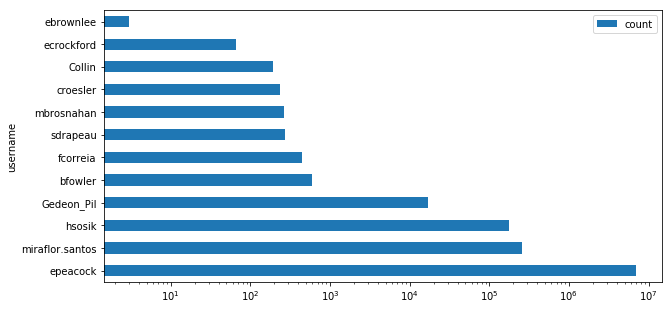

In [5]:
%matplotlib inline

# use a logarithmic scale because of how many orders of magnitude the data covers
leaderboard.plot.barh(logx=True, figsize=(10,5));